In [1]:
# Import Dependencies 
from splinter import Browser
from bs4 import BeautifulSoup as bs
import time

In [2]:
# path to chromedriver
!which chromedriver

/usr/local/bin/chromedriver


## Visit the NASA mars news site

In [11]:
# Visit the mars nasa news site
executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
browser = Browser("chrome", **executable_path, headless=False)

# Optional delay for loading the page
#browser.is_element_present_by_css("ul.item_list li.slide", wait_time=1)

False

In [12]:
url = "https://mars.nasa.gov/news/"

In [13]:
browser.visit(url)

In [14]:
# Convert the browser html to a  soup object and then quit the browser
html = browser.html

# create a parse tree for parsed pages that can be used to extract data from HTML
new_soup1 = bs(html, 'html.parser')

In [15]:
slide_item = new_soup1.select_one('ul.item_list li.slide')

In [16]:
print(slide_item)

<li class="slide"><div class="image_and_description_container"><a href="/news/8545/nasas-mars-2020-heads-into-the-test-chamber/" target="_self"><div class="rollover_description"><div class="rollover_description_inner">In this time-lapse video taken at JPL, engineers move the Mars 2020 rover into a large vacuum chamber for testing in Mars-like environmental conditions.</div><div class="overlay_arrow"><img alt="More" src="/assets/overlay-arrow.png"/></div></div><div class="list_image"><img alt="In this time-lapse video taken at JPL, engineers move the Mars 2020 rover into a large vacuum chamber for testing in Mars-like environmental conditions." src="/system/news_items/list_view_images/8545_24679_PIA23470-1041_320x240px.jpg"/></div><div class="bottom_gradient"><div><h3>NASA's Mars 2020 Heads Into the Test Chamber</h3></div></div></a><div class="list_text"><div class="list_date">November  7, 2019</div><div class="content_title"><a href="/news/8545/nasas-mars-2020-heads-into-the-test-chamb

In [17]:
slide_item.find("div", class_="content_title").get_text()

"NASA's Mars 2020 Heads Into the Test Chamber"

In [18]:
# Used the parent element to find the first a tag and save it 
news_title = slide_item.find("div", class_="content_title").get_text()

In [19]:
news_title

"NASA's Mars 2020 Heads Into the Test Chamber"

In [20]:
# Use the parent element to find the paragraph text
news_paragraph = slide_item.find("div", class_="article_teaser_body").get_text()

In [21]:
news_paragraph

'In this time-lapse video taken at JPL, engineers move the Mars 2020 rover into a large vacuum chamber for testing in Mars-like environmental conditions.'

## JPL Space Images Featured Image

In [22]:
# Visit URL 
url2 = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"

In [23]:
browser.visit(url2)

In [24]:
# Find and click the full image button
full_image = browser.find_by_id("full_image")

In [25]:
full_image.click()

In [26]:
time.sleep(2)

In [27]:
# Click the more info button
more_info = browser.find_link_by_partial_text('more info')

In [28]:
more_info.click()

In [29]:
# Parse the resulting html with soup
html2 = browser.html
new_soup2 = bs(html2, "html.parser")

<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-" style=""><!-- START HEADER: "DEFAULT" --><!-- Google Tag Manager --><head><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5dc5f450392e6b66&amp;bkl=0&amp;bl=1&amp;pdt=532&amp;sid=5dc5f450392e6b66&amp;pub=&amp;rev=v8.28.1-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2Fdetails.php%3Fid%3DPIA18906&amp;fr=spaceimages%2F%3Fsearch%3D%26category%3DMars&amp;of=2&amp;pd=0&amp;
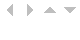

In [30]:
new_soup2

In [31]:
# find the relative image url
partial_url = new_soup2.select_one('figure.lede a img').get("src")
partial_url

'/spaceimages/images/largesize/PIA18906_hires.jpg'

In [32]:
# Use the base url to create an absolute url
full_url = "https://www.jpl.nasa.gov" + partial_url

In [33]:
full_url

'https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA18906_hires.jpg'

## Mars Facts

In [34]:
url3 = "https://twitter.com/marswxreport?lang=en"

In [35]:
browser.visit(url3)

In [36]:
html3 = browser.html
new_soup3 = bs(html3, "html.parser")

In [39]:
new_soup3

<html data-scribe-reduced-action-queue="true" lang="en"><head>
<meta charset="utf-8"/>
<script async="" src="//www.google-analytics.com/analytics.js"></script><script nonce="">
        !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")>-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
      </script>
<script id="bouncer_terminate_iframe" nonce="">
    if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
<script id="ttft_boot_data" nonce="">
    window.ttftData={"transaction_id":"00f3584c00ec738b.fa178d6caeaea49a\u003c:0025e46b0039567c","server_request_start_time":1573254633549,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_a\/1.0.1\/20190918.2229.d168947","ttft_browser":"chrome"};!function(){function t(t,n){window.ttftData&&!window.ttftData[t]&&(window.t

In [40]:
#Save the tweet text for the weather report as a variable 
mars_weather = new_soup3.find('div', attrs={"class": "tweet", "data-name": "Mars Weather"})
# we use this and not the id because we want to get the first tweet at the top of the headline
# not the specfic tweet

In [41]:
mars_weather_tweet = mars_weather.find('p', 'tweet-text').get_text()

In [42]:
import pandas as pd

In [46]:
# Visit the Mars Facts webpage and use Pandas to scrape the table containing facts 
# about the planet including Diameter, Mass, etc.

df = pd.read_html('http://space-facts.com/mars/')[0]

In [47]:
df

,0,1
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.38 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-87 to -5 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [48]:
df.columns=['description', 'value']
df.set_index('description', inplace=True)
df

,value
description,
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.39 × 10^23 kg (0.11 Earths)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.38 AU)"
Orbit Period:,687 days (1.9 years)
Surface Temperature:,-87 to -5 °C
First Record:,2nd millennium BC
Recorded By:,Egyptian astronomers


In [49]:
# Use Pandas to convert the data to a HTML table string
html_mars_table = df.to_html()

In [50]:
html_mars_table = html_mars_table.replace('\n', '')

In [52]:
html_mars_table

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>value</th>    </tr>    <tr>      <th>description</th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Equatorial Diameter:</th>      <td>6,792 km</td>    </tr>    <tr>      <th>Polar Diameter:</th>      <td>6,752 km</td>    </tr>    <tr>      <th>Mass:</th>      <td>6.39 × 10^23 kg (0.11 Earths)</td>    </tr>    <tr>      <th>Moons:</th>      <td>2 (Phobos &amp; Deimos)</td>    </tr>    <tr>      <th>Orbit Distance:</th>      <td>227,943,824 km (1.38 AU)</td>    </tr>    <tr>      <th>Orbit Period:</th>      <td>687 days (1.9 years)</td>    </tr>    <tr>      <th>Surface Temperature:</th>      <td>-87 to -5 °C</td>    </tr>    <tr>      <th>First Record:</th>      <td>2nd millennium BC</td>    </tr>    <tr>      <th>Recorded By:</th>      <td>Egyptian astronomers</td>    </tr>  </tbody></table>'

## Mars Hemispheres

In [53]:
url4 = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars"

In [54]:
browser.visit(url4)

In [55]:
html4 = browser.html
new_soup4 = bs(html4, "html.parser")

In [56]:
print(new_soup4.prettify())

<html lang="en">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.3/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <title>
   Astropedia Search Results | USGS Astrogeology Science Center
  </title>
  <meta content="USGS Astrogeology Science Center Astropedia search results." name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" name="google-site-verification"/>
  <!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
  <link href="/css/main.css" media="screen" rel="stylesheet"/>
  <link href="/css/print.css" media="print" rel="styles

In [57]:
# create a list to store hemisphere urls
hemisphere_image_urls = []
# get a list of all of the hemispheres
links = browser.find_by_css("a.product-item h3") 
# all the a.product-item h3 that are located in that area

In [58]:
len(links)

4

In [61]:
for i in range(len(links)):
    hemisphere = {}
    browser.find_by_css("a.product-item h3")[i].click()
    sample_element = browser.find_link_by_text("Sample").first
    hemisphere["img_url"] = sample_element["href"]
    hemisphere["title"] = browser.find_by_css("h2.title").text
    hemisphere_image_urls.append(hemisphere)
    browser.back()   

In [62]:
hemisphere_image_urls

[{'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg', 'title': 'Cerberus Hemisphere Enhanced'}, {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg', 'title': 'Schiaparelli Hemisphere Enhanced'}, {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg', 'title': 'Syrtis Major Hemisphere Enhanced'}, {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg', 'title': 'Valles Marineris Hemisphere Enhanced'}]